<a name="modes"></a>
# Renko Modes

#### In `renko_df()`, as well as in `plot()` and `renko_animate()` where it is called,<br> We can choose the method for building the OHLCV Renko Dataframe, there are **7 modes available**, where 3 are significant variations:

  - `"normal"`: Standard Renko.
  - `"wicks"`: Standard Renko with Wicks. *(default)*
  - `"nongap"`: Same logic of *'wicks'* mode but the OPEN will have the same value as the respective wick.
  - `"reverse-wicks"`: *'wicks'* only on price reversals.
  - `"reverse-nongap"`: *'nongap'* only in price reversals.
  - `"fake-r-wicks"`: fake reverse wicks, where it will have the same value as the Previous Close.
  - `"fake-r-nongap"`: fake reverse nongap, where it will have the same value as the Previous Close.

The advantage is that we can have multiple dataframes of different modes from the same instance.

### Let's take a closer look at these modes

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

from renkodf import Renko

In [3]:
df_ticks = pd.read_parquet('examples/data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

r = Renko(df_ticks, 0.0003)

all_modes = ['normal', 'wicks', 'nongap', 'reverse-wicks', 'reverse-nongap', 'fake-r-wicks', 'fake-r-nongap']
dfs = []
for mode in all_modes:
    df = r.renko_df(mode)
    dfs.append(
        df.loc[(df.index >= '2023-06-23 13:04') & (df.index <= '2023-06-26 10:47')]
    )

 100.0%

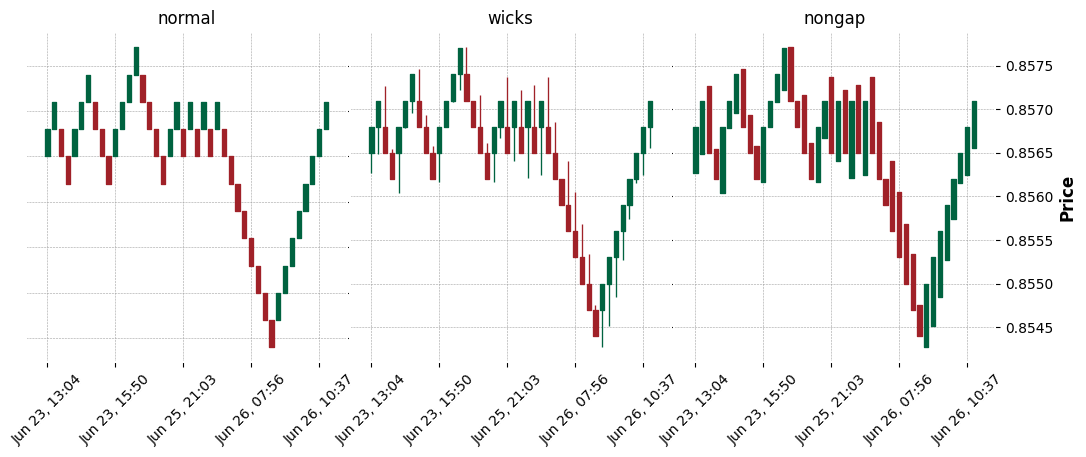

In [4]:
fig = mpf.figure(style='charles', figsize=(12.5,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)

axs = []
for i in range(1, 4):
    axs.append(fig.add_subplot(2,3,i))

for ax, df, mode in zip(axs, dfs[:3], all_modes[:3]):
    mpf.plot(df,type='candle',ax=ax,axtitle=mode)

mpf.show()

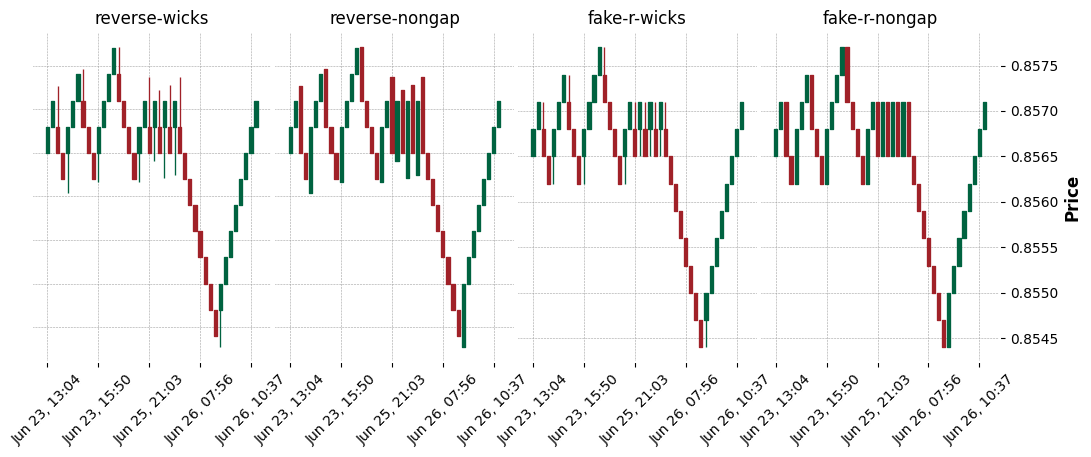

In [5]:
fig = mpf.figure(style='charles', figsize=(12.5,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)

axs = []
for i in range(1, 5):
    axs.append(fig.add_subplot(2,4,i))

for ax, df, mode in zip(axs, dfs[-4:], all_modes[-4:]):
    mpf.plot(df,type='candle',ax=ax,axtitle=mode)

mpf.show()